### Objectives
    import dataset
    Broad scan of classification algorithms and compare it to linearSVC
    visualize
    
    This was originally cloned from Kaggle kernal.  Modification was added to try out various algo. 

In [1]:
import numpy as np 
import pandas as pd


    Training Data

In [2]:
training_variants_df = pd.read_csv("input/training_variants")

In [3]:
training_variants_df.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
training_text_df = pd.read_csv("input/training_text",sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [5]:
training_text_df.head(5)

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [6]:
training_text_df["Text"][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [7]:
training_merge_df = training_variants_df.merge(training_text_df,left_on="ID",right_on="ID")

In [8]:
training_merge_df.head(5)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [9]:
training_merge_df.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'Text'], dtype='object')

Testing Data

In [10]:
testing_variants_df = pd.read_csv("input/test_variants")

In [11]:
testing_variants_df.head(5)

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [12]:
testing_text_df = pd.read_csv("input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [13]:
testing_text_df.head(5)

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [14]:
testing_merge_df = testing_variants_df.merge(testing_text_df,left_on="ID",right_on="ID")

In [15]:
testing_merge_df.head(5)

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [16]:
training_merge_df["Class"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Describing both Training and Testing data

In [17]:
training_merge_df.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [18]:
testing_merge_df.describe()

,ID
count,5668.000000
mean,2833.500000
std,1636.354994
min,0.000000
25%,1416.750000
50%,2833.500000
75%,4250.250000
max,5667.000000


Check for missing values in both training and testing data columns

<Container object of 9 artists>

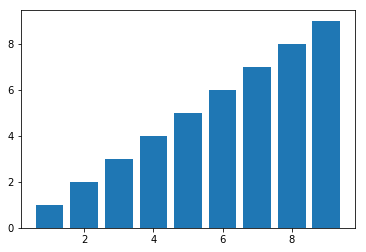

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.bar(training_variants_df['Class'].unique(), training_variants_df['Class'].groupby([1,2,3]))
plt.bar(training_variants_df['Class'].unique(), [1,2,3,4,5,6,7,8,9])

Split the training data to train and test for checking the model accuracy

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(training_merge_df,test_size=0.2) 
np.random.seed(0)
train

,ID,Gene,Variation,Class,Text
293,293,CHEK2,I157T,6,"Recently, a functionally defective CHEK2 varia..."
681,681,CDKN2A,R87L,4,BACKGROUND: Point mutations in the tumor suppr...
285,285,EIF1AX,A113_splice,7,Poorly differentiated thyroid cancer (PDTC) an...
191,191,EGFR,S921R,6,To assess the role of various epidermal growth...
519,519,TP53,R273G,1,Mutation of the tumor suppressor TP53 gene occ...
1759,1759,IDH1,V294M,5,Introduction Somatic mutations in human cytoso...
389,389,TP53,S121A,2,Tumor suppressor p53-dependent apoptosis is th...
3247,3247,DDR2,Amplification,2,Introduction Adipocytic tumors are classified...
712,712,ERBB2,C630Y,6,Purpose: Mutations associated with resistance ...
72,72,RAD50,L234fs,1,"The Mre11 complex, composed of RAD50, NBS1 and..."


In [21]:
train.describe()

,ID,Class
count,2656.000000,2656.000000
mean,1662.333961,4.364081
std,955.847472,2.301963
min,0.000000,1.000000
25%,844.750000,2.000000
50%,1657.500000,4.000000
75%,2485.500000,7.000000
max,3320.000000,9.000000


In [22]:
X_train = train['Text'].values
X_test = test['Text'].values
y_train = train['Class'].values
y_test = test['Class'].values

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn import tree
from sklearn.metrics import log_loss

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


Set pipeline to build a complete text processing model with Vectorizer, Transformer and LinearSVC

In [24]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
])
text_clf = text_clf.fit(X_train,y_train)

#clf=svm.SVC(kernel='linear',probability=True)
text_clf1 = Pipeline([('vect1', CountVectorizer()),
                     ('tfidf1', TfidfTransformer()),
                     ('clf1', tree.DecisionTreeClassifier())
])
text_clf1 = text_clf1.fit(X_train,y_train)

text_clf2 = Pipeline([('vect2', CountVectorizer()),
                     ('tfidf2', TfidfTransformer()),
                     ('clf2', RandomForestClassifier())
])
text_clf2 = text_clf2.fit(X_train,y_train)

text_clf3 = Pipeline([('vect3', CountVectorizer()),
                     ('tfidf3', TfidfTransformer()),
                     ('clf3', GaussianNB())
])
#text_clf3 = text_clf3.fit(X_train.todense(),y_train)

text_clf4 = Pipeline([('vect4', CountVectorizer()),
                     ('tfidf4', TfidfTransformer()),
                     ('clf4', LogisticRegression())
])
#text_clf4 = text_clf4.fit(X_train,y_train)

### Try different ensemble models to get more accurate model. 

In [25]:
y_test_predicted = text_clf.predict(X_test)
#y_test_predicted1 = text_clf1.predict(X_test)
np.mean(y_test_predicted == y_test)
#np.mean(y_test_predicted1 == y_test)

0.64360902255639096

In [26]:
y_test_predicted1 = text_clf1.predict(X_test)
np.mean(y_test_predicted1 == y_test)
#log_loss(y_test, y_test_predicted)

0.58947368421052626

In [27]:
y_test_predicted2 = text_clf2.predict(X_test)
np.mean(y_test_predicted2 == y_test)

0.59999999999999998

In [28]:
#y_test_predicted3 = text_clf3.predict(X_test)
#np.mean(y_test_predicted3 == y_test)

In [29]:
#y_test_predicted4 = text_clf4.predict(X_test)
#np.mean(y_test_predicted4 == y_test)

Predicting values for test data

In [30]:
X_test_final = testing_merge_df['Text'].values

In [31]:
predicted_class = text_clf.predict(X_test_final)
predicted_class1 = text_clf1.predict(X_test_final)

In [32]:
testing_merge_df['predicted_class'] = predicted_class
testing_merge_df1 = testing_variants_df.merge(testing_text_df,left_on="ID",right_on="ID")
testing_merge_df1['predicted_class'] = predicted_class1

Appended the predicted values to the testing data

In [33]:
testing_merge_df.head(5)
#print('testing_merge_df1')
#testing_merge_df1.head(5)

,ID,Gene,Variation,Text,predicted_class
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,4
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4


In [34]:
testing_merge_df1.head(5)

,ID,Gene,Variation,Text,predicted_class
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,7
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,7
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,7


Onehot encoding to get the predicted values as columns

In [35]:
onehot = pd.get_dummies(testing_merge_df['predicted_class'])
testing_merge_df = testing_merge_df.join(onehot)

In [36]:
testing_merge_df.head(5)

,ID,Gene,Variation,Text,predicted_class,1,2,3,4,5,6,7,8,9
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7,0,0,0,0,0,0,1,0,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4,0,0,0,1,0,0,0,0,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,4,0,0,0,1,0,0,0,0,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7,0,0,0,0,0,0,1,0,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4,0,0,0,1,0,0,0,0,0


In [37]:
onehotPredicted_label=pd.get_dummies(y_test_predicted)
onehot_label = pd.get_dummies(y_test)
log_loss(onehot_label, onehotPredicted_label)

12.309308279088478

In [38]:
onehotPredicted_label1=pd.get_dummies(y_test_predicted1)
onehot_label = pd.get_dummies(y_test)
log_loss(onehot_label, onehotPredicted_label1)

14.179076625279132

In [39]:
onehot1 = pd.get_dummies(testing_merge_df1['predicted_class'])
testing_merge_df1 = testing_merge_df1.join(onehot1)

In [40]:
testing_merge_df1.head(5)

,ID,Gene,Variation,Text,predicted_class,1,2,3,4,5,6,7,8,9
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7,0,0,0,0,0,0,1,0,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,7,0,0,0,0,0,0,1,0,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,7,0,0,0,0,0,0,1,0,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7,0,0,0,0,0,0,1,0,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,7,0,0,0,0,0,0,1,0,0


Preparing submission data

In [41]:
submission_df = testing_merge_df[["ID",1,2,3,4,5,6,7,8,9]]
submission_df.columns = ['ID', 'class1','class2','class3','class4','class5','class6','class7','class8','class9']
submission_df.head(5)

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0


In [42]:
submission_df1 = testing_merge_df1[["ID",1,2,3,4,5,6,7,8,9]]
submission_df1.columns = ['ID', 'class1','class2','class3','class4','class5','class6','class7','class8','class9']
submission_df1.head(5)

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,1,0,0
3,3,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,0,1,0,0


In [43]:
submission_df.to_csv('submission_linearSVC.csv', index=False)

In [44]:
submission_df1.to_csv('submission_decisionTree.csv', index=False)

If you really feel this will help you. Please upvote this and encourage me to write more. 